<a href="https://colab.research.google.com/github/DaissyM/I_A/blob/main/correccionProfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

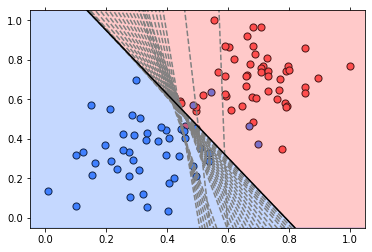

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

get_ipython().run_line_magic('matplotlib', 'inline')

# datos random
np.random.seed(42)

#funcion escalon
def escalon(t):
    if t >= 0:
        return 1
    return 0

def activacion(X,W,b):
     z=((np.matmul(X,W)+b))
     return escalon(z)

# TODO: Algoritmo Perceptron.adicion 
def perceptron_escalon(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        valor = activacion(X[i],W,b)
        if y[i]-valor == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-valor == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    # Fill in code
    return W, b

# In[6]:


def entrenamiento(X, y, learn_rate=0.01, num_epochs=30):
    """
    Esta funcion entrena el perceptron repetidamente en el dataset y retorna las lineas de clasificacion
    obtenidas en las iteraciones,
    
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    # Lineas que seran ploteadas.
    lineas = []
    for i in range(num_epochs):
        # En cada epoch, se aplica el perceptron.
        W, b = perceptron_escalon(X, y, W, b, learn_rate)
        lineas.append((-W[0]/W[1], -b/W[1]))
    return lineas

def plot_line(m, b, linestyle='dashed', color='gray', fill=False):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-10.0, 10.0, 0.1)
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
        plt.fill_between(x, m*x+b, -0.05, color=blue, alpha=0.3)
        plt.fill_between(x, m*x+b, 1.05, color=red, alpha=0.3)
        
# Cargamos data
data = np.asarray(pd.read_csv("https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv"))
X = data[:,0:2]
y = data[:,2]


# Modifique a su criterio la learning rate y en numero de epoch 
lineas = entrenamiento(X, y)

# Estilo Plot
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')

# Scatter para el grafico
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# Plotea lineas y regiones solucion.
for line in lineas:
    slope = line[0]
    b = line[1]
    plot_line(slope, b)
solution_slope = lineas[-1][0]
solution_intercept = lineas[-1][1]
plot_line(solution_slope, solution_intercept, 'solid', 'k', True)